In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%%time
#importar galeries
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
import seaborn as sns

#Valors a canviar al canviar d'any:
estació="Albuquerque"
any=2022
dies_febrer=28
excel=openpyxl.load_workbook("2022_tfg_Albuquerque.xlsx")#obrim l'excel

Wall time: 17.1 s


In [3]:
#%%time
#en aquesta cela agafarem els valors de l'excel d'algunes pressions

#arrays amb els valors dels dies les pressions i els mesos
dies=["01","02","03","04","05","06","07","08","09","10","11","12","13"
      ,"14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"]
pressions=["700.0","500.0","400.0","300.0","200.0","150.0","100.0","50.0","30.0","20.0"]
mesos=["gener","febrer","març","abril","maig","juny","juliol","agost","setembre"
       ,"octubre","novembre","desembre"]
mesos_31dies=["gener","març","maig","juliol","agost","octubre","desembre"]
mesos_30dies=["abril","juny","setembre","novembre"]
ab=[" Jan"," Fe"," Ma"," Apr"," May"," Ju"," Ju"," Au"," Se"," Oc"," No"," De"]
a_final=[]#aixó ens servirà per després afegir els valors dels mesos que no fem aquí
dates_00=[]
dates_12=[]
GR=[]#quants es guarden valors als arrays per graficar
bib=[]#de quants dies s'en miren les dades

num_pressions=len(pressions)#número de pressions que treballem

#fem matrius on hi colocarem els valors de temperatura, temperatura de rosada, humitat relativa i mixr de cada pressió
num_valors=800
#en aquests arrays hi posaré els valor pensats per fer la mitjana sense 0 ni nan que puguin alterar-la:
dades_temp_00=np.zeros((num_pressions,num_valors))
dades_tempros_00=np.zeros((num_pressions,num_valors))
dades_humrel_00=np.zeros((num_pressions,num_valors))
dades_mixr_00=np.zeros((num_pressions,num_valors))
#aquest és l'array per graficar que esta pensat perqué
#tingui un valor per cada dia i cada valor en la posició corresponent del dia de l'any
#si un dia no té valor se li posa nan:
dades_temp_00_graf=np.zeros((num_pressions,num_valors))


dades_temp_12=np.zeros((num_pressions,num_valors))
dades_tempros_12=np.zeros((num_pressions,num_valors))
dades_humrel_12=np.zeros((num_pressions,num_valors))
dades_mixr_12=np.zeros((num_pressions,num_valors))

dades_temp_12_graf=np.zeros((num_pressions,num_valors))

#el primer valor que guardarem a cada fila serà el de la pressió del que se'n diuen valors en aquella fila per no perdre'ns
for i in np.arange(0,num_pressions):
    dades_temp_00_graf[i][0]=pressions[i]
    dades_temp_00[i][0]=pressions[i]
    dades_tempros_00[i][0]=pressions[i]
    dades_humrel_00[i][0]=pressions[i]
    dades_mixr_00[i][0]=pressions[i]

    dades_temp_12_graf[i][0]=pressions[i]
    dades_temp_12[i][0]=pressions[i]
    dades_tempros_12[i][0]=pressions[i]
    dades_humrel_12[i][0]=pressions[i]
    dades_mixr_12[i][0]=pressions[i]

print("1")
for pres in np.arange(0,num_pressions):#aquí fem un loop amb una iteració per cada pressió que estudiem
    bibo=0
    a=0
    a12=0
    b=0
    gr=0#marca on es colocaran els valors per graficar de manera que cada dia tingui un valor (per les 00 de la nit)
    gr12=0#el mateix però per les 12 del migdia
    for mes in mesos:#fem-ne un altre amb una iteració per cada mes/full de l'excel
      
        full=excel[mes]#agafem el full de l'excel del mes que fem
        columna=full["G"]#la columna de l'excel on hi ha indicat l'hora i el dia de la mesura
        columna2=full["H"]
        col_press=full["B"]#la columna de l'excel amb les pressions


        if mes in mesos_31dies:
            dimes=31
        elif mes in mesos_30dies:
            dimes=30
        elif mes=="febrer":
            dimes=dies_febrer
        fsegüent=9
        for i in np.arange(0,dimes):#m'ha semblat que teniem pocs loops, així que un amb una iteració per dia del mes
         
            bibo+=1
            u=0
            v=0

           
    #aniria tot mes ràpid si en contes de full.max_raw 1 posses un número molt gros però no tant
            for fila in range(fsegüent-8, full.max_row + 1):#loop amb una iteració per cela de la columna amb l'hora i el dia
                #print(fila, "fila")
                celda = full["G" + str(fila)]
                celda2 = full["H" + str(fila)]
                
                #aquí faré per les 12 de la nit
                string_nit="00Z "+dies[i]#l'string que trobarem en l'excel per indicar aquell dia a les 00 de la nit
                string_nit2="t 00Z "+dies[i]#el mateix en altres mesos
                string_nit3="at 00Z"

                string_nit3c2=dies[i]+ab[mesos.index(mes)]

                if celda.value==string_nit or celda.value==string_nit2 or (celda.value==string_nit3 and celda2.value==string_nit3c2) or celda2.value==string_nit:#si a la cela hi ha aquesta string

                    u=1
                    #print(celda.value)
                    c, f=openpyxl.utils.cell.coordinate_from_string(celda.coordinate)#pren la columna i fila de la cela indicant l'hora i el dia
                    #ara que tenim la cela volem mirar fins on acaben les dades d'aquella hora i dia
                    for fila in np.arange(f+10,f+300):#busquem en aquestes files
                        if full.cell(row=fila, column=openpyxl.utils.column_index_from_string("B")).value=="1000.0":#busquem la fila amb el valor 1000.0 de la següent mesura
                            fsegüent=fila#ens apuntem la fila
                            #print(fsegüent,"fsegüent")
                            break


                    e=a
                    for fil in np.arange(f,fsegüent):#ara fem un loop per mirar cada fila de només aquesta mesura
                        cell=full.cell(row=fil, column=openpyxl.utils.column_index_from_string("B"))#mirem la cela de columna de les pressions i fila de la iteració
                        if cell.value==pressions[pres]:#a veure si hi ha la pressió que busquem
                            gr+=1
                            a+=1#aquest valor marca la columna on colocarà la dada dels nostres arrays amb dades
                            cv, fv=openpyxl.utils.cell.coordinate_from_string(cell.coordinate)#apuntem columna i fila de la cela amb la pressió que buscavem
                            #d'aquella fila/pressió prendrem els valors de les columnes amb la temperatura, la temperatura de rosada, la humitat relativa i el mixr
                            pT=openpyxl.utils.cell.get_column_letter(4) + str(fv)#coordenada de la tempertura
                            if isinstance(full[pT].value, str):#si el valor està presentable per l'amor de Déu
                                dades_temp_00[pres][a]=float(full[pT].value)#ens apuntem el valor en el nostre arrays de dades
                                dades_temp_00_graf[pres][gr]=float(full[pT].value)
                            #fem el mateix per la temperatura de rosada, humitat relativa i mixr:
                            pTr=openpyxl.utils.cell.get_column_letter(5) + str(fv)
                            if isinstance(full[pTr].value, str):
                                dades_tempros_00[pres][a]=float(full[pTr].value)

                            phr=openpyxl.utils.cell.get_column_letter(6) + str(fv)
                            if isinstance(full[phr].value, str) or isinstance(full[phr].value, int):
                                dades_humrel_00[pres][gr]=float(full[phr].value)

                            pmixr=openpyxl.utils.cell.get_column_letter(7) + str(fv)
                            if isinstance(full[pmixr].value, str):
                                dades_mixr_00[pres][a]=float(full[pmixr].value)
                            break

                    if a==e:#si pasa això el valor d'a no ha canviat i no s'ha trobat mesures d'aquell dia en aquella pressió
                        gr+=1
                        dades_temp_00_graf[pres][gr]=np.nan
                        dades_humrel_00[pres][gr]=np.nan
                        dades_tempros_00[pres][gr]=np.nan
                        



                #aquí faré per les 12 del dia
                string_dia="12Z "+dies[i]
                string_dia2="t 12Z "+dies[i]
                string_dia3="at 12Z"
                string_nit3c2=dies[i]+ab[mesos.index(mes)]
                if celda.value==string_dia or celda.value==string_dia2 or (celda.value==string_dia3 and celda2.value==string_nit3c2) or celda2.value==string_dia:
                    v=1
                    #print(celda.value)
                    c, f=openpyxl.utils.cell.coordinate_from_string(celda.coordinate)#pren la columna i fila de la cela indicant l'hora i el dia
                    #ara que tenim la cela volem mirar fins on acaben les dades d'aquella hora i dia
                    for fila in np.arange(f+10,f+300):#busquem en aquestes files
                        if full.cell(row=fila, column=openpyxl.utils.column_index_from_string("B")).value=="1000.0":#busquem la fila amb el valor 1000.0 de la següent mesura
                            fsegüent=fila#ens apuntem la fila
                            break

                    e12=b
                    for fil in np.arange(f,fsegüent):#ara fem un loop per mirar cada fila de només aquesta mesura
                        cell=full.cell(row=fil, column=openpyxl.utils.column_index_from_string("B"))#mirem la cela de columna de les pressions i fila de la iteració
                        if cell.value==pressions[pres]:#a veure si hi ha la pressió que busquem
                            gr12+=1
                            b+=1#aquest valor marca la columna on colocarà la dada dels nostres arrays amb dades
                            cv, fv=openpyxl.utils.cell.coordinate_from_string(cell.coordinate)#apuntem columna i fila de la cela amb la pressió que buscavem
                            #d'aquella fila/pressió prendrem els valors de les columnes amb la temperatura, la temperatura de rosada, la humitat relativa i el mixr
                            pT=openpyxl.utils.cell.get_column_letter(4) + str(fv)#coordenada de la tempertura
                            if isinstance(full[pT].value, str):#si el valor està presentable per l'amor de Déu
                                dades_temp_12[pres][b]=float(full[pT].value)#ens apuntem el valor en el nostre arrays de dades
                                dades_temp_12_graf[pres][gr12]=float(full[pT].value)
                            #fem el mateix per la temperatura de rosada, humitat relativa i mixr:
                            pTr=openpyxl.utils.cell.get_column_letter(5) + str(fv)
                            if isinstance(full[pTr].value, str):
                                dades_tempros_12[pres][b]=float(full[pTr].value)

                            phr=openpyxl.utils.cell.get_column_letter(6) + str(fv)
                            if isinstance(full[phr].value, str) or isinstance(full[phr].value, int):
                                dades_humrel_12[pres][gr12]=float(full[phr].value)

                            pmixr=openpyxl.utils.cell.get_column_letter(7) + str(fv)
                            if isinstance(full[pmixr].value, str):
                                dades_mixr_12[pres][b]=float(full[pmixr].value)
                            break
                    if b==e12:#si pasa això el valor d'b no ha canviat i no s'ha trobat mesures d'aquell dia en aquella pressió
                        gr12+=1
                        dades_temp_12_graf[pres][gr12]=np.nan
                        dades_humrel_12[pres][gr12]=np.nan
                    break
            if u==0:#si passa això el valor de u no ha canviat i, per tant, no hi ha mesures d'aquest dia i hora
                #en aquest if possem un valor en el array a graficar perquè segueixi anant en ordre i cada dia estigui en el seu índex corresponent
                gr+=1
                dades_temp_00_graf[pres][gr]=np.nan
                dades_humrel_00[pres][gr]=np.nan
                dades_tempros_00[pres][gr]=np.nan
            if v==0:#si passa això el valor de u no ha canviat i, per tant, no hi ha mesures d'aquest dia i hora
                #en aquest if possem un valor en el array a graficar perquè segueixi anant en ordre i cada dia estigui en el seu índex corresponent
                gr12+=1
                dades_temp_12_graf[pres][gr12]=np.nan
                dades_humrel_12[pres][gr12]=np.nan
    bib=np.append(bib,bibo)
    GR=np.append(GR,gr)
print("quants es guarden valors als arrays per graficar:",GR)
print("de quants dies s'en miren les dades:", bib)

1
quants es guarden valors als arrays per graficar: [365. 365. 365. 365. 365. 365. 365. 365. 365. 365.]
de quants dies s'en miren les dades: [365. 365. 365. 365. 365. 365. 365. 365. 365. 365.]


In [4]:
#prendre mesures més díficils de prendre fent-ho amb intervals

#pren de 599 a 621 i fas que és a 610
#arrays amb els valors de pressió de cada interval que estudiarem
press610=np.arange(599.0,621.0,step=1.0)#entre 599 i 621 direm que són valors a 610hPa
press830=np.arange(819.0,841.0,step=1.0)#entre 819 i 841 diremq ue són valors a 830hPa

press2=[press610,press830]#array dels arrays

num_pressions2=2#num de pressions que farem amb aquest métode d'intervals

#prepararem els arrays on colocarem els valors
dades2_tr_00_graf=np.zeros((num_pressions2,num_valors))#de temp de rosada
dades2_tr_12_graf=np.zeros((num_pressions2,num_valors))

#una fila per pressió i la primera columna coloquem quina pressió es cada fila
#per no perdrens
dades2_tr_00_graf[0][0]="610.0"
dades2_tr_00_graf[1][0]="830.0"
dades2_tr_12_graf[0][0]="610.0"
dades2_tr_12_graf[1][0]="830.0"

#de humitat relativa:
extrahr_00=np.zeros((1,num_valors))
extrahr_00[0][0]="610.0"

dades2_temp_00_graf=np.zeros((num_pressions2,num_valors))#de temperatura
dades2_temp_00_graf[0][0]="610.0"
dades2_temp_00_graf[1][0]="830.0"
dades2_temp_12_graf=np.zeros((num_pressions2,num_valors))#de temperatura
dades2_temp_12_graf[0][0]="610.0"
dades2_temp_12_graf[1][0]="830.0"


for pres in [0,1]:#aquí fem un loop amb una iteració per cada pressió que estudiem

    b=0#aquest valor indicarà la columna a la que pertoca el valor d'aquell dia

    for mes in mesos:#fem-ne un altre amb una iteració per cada mes/full de l'excel
        print(mes)
        full=excel[mes]#agafem el full de l'excel del mes que fem
        columna=full["G"]#la columna de l'excel on hi ha indicat l'hora i el dia de la mesura
        col_press=full["B"]#la columna de l'excel amb les pressions
        celda2 = full["H" + str(fila)]

        #el valor dimes serà el nombre de dies que té el mes que toca
        if mes in mesos_31dies:
            dimes=31
        elif mes in mesos_30dies:
            dimes=30
        elif mes=="febrer":
            dimes=dies_febrer

        fsegüent=9
        for i in np.arange(0,dimes):#m'ha semblat que teniem pocs loops, així que un amb una iteració per dia del mes
            print(dies[i],"dia")
            #com alguns sets de mesures tenen dos o més mesures dins l'interval,
            #per cada dia es creen buits següents arrays i els vaig omplint amb les mesures
            #d'aquell dia i hora dins l'interval. Després es pren com a valor d'aquell
            #dia la mitjana del que hi hagi en els arrays. Així, els valors dels dies
            #que tenen més d'un valor dins linterval no tenen més pes en la mitjana anual.

            valorsT00=[]#valors del dia i hora de la temperatura dins l'interval
            valorsTr00=[]#mateix per T de rosada
            valorshr00=[]#humitat relativa
            valorsmixr00=[]#i mixr

            valorsT12=[]
            valorsTr12=[]
            valorshr12=[]
            valorsmixr12=[]

            b+=1#aquest valor marca la columna on colocarà la dada dels nostres arrays amb dades
            for fila in range(fsegüent-8, full.max_row + 1):#loop amb una iteració per cela de la columna amb l'hora i el dia

                celda = full["G" + str(fila)]
                celda2 = full["H" + str(fila)]

                string_nit="00Z "+dies[i]#l'string que trobarem en l'excel per indicar aquell dia a les 00 de la nit
                string_nit2="t 00Z "+dies[i]#el mateix en altres mesos
                string_nit3="at 00Z"
                string_nit3c2=dies[i]+ab[mesos.index(mes)]
                if celda.value==string_nit or celda.value==string_nit2 or (celda.value==string_nit3 and celda2.value==string_nit3c2) or celda2.value==string_nit:#si a la cela hi ha aquesta string

                    c, f=openpyxl.utils.cell.coordinate_from_string(celda.coordinate)#pren la columna i fila de la cela indicant l'hora i el dia
                    #ara que tenim la cela volem mirar fins on acaben les dades d'aquella hora i dia
                    for fila in np.arange(f+10,f+300):#busquem en aquestes files
                        if full.cell(row=fila, column=openpyxl.utils.column_index_from_string("B")).value=="1000.0":#busquem la fila amb el valor 1000.0 de la següent mesura
                            fsegüent=fila#ens apuntem la fila
                            break
                    #ara sabem que les mesures d'aquella hora i dia estan entre la fila "f" i la fila "fsegüent"


                    for fil in np.arange(f,fsegüent):#ara fem un loop per mirar cada una d'aquestes files


                        cell=full.cell(row=fil, column=openpyxl.utils.column_index_from_string("B"))#mirem la cela de columna de les pressions i fila de la iteració
                        if cell.value in np.array(press2[pres], dtype=str):#a veure si hi ha la pressió que busquem, si hi és:


                            cv, fv=openpyxl.utils.cell.coordinate_from_string(cell.coordinate)#apuntem columna i fila de la cela amb la pressió que buscavem
                            #d'aquella fila/pressió prendrem els valors de les columnes amb la temperatura, la temperatura de rosada, la humitat relativa i el mixr:

                            pT=openpyxl.utils.cell.get_column_letter(4) + str(fv)#coordenada de la tempertura
                            if isinstance(full[pT].value, str):#si el valor està presentable per l'amor de Déu
                                valorsT00=np.append(valorsT00, float(full[pT].value))#ens apuntem el valor en el nostre arrays de dades

                            #fem el mateix per la temperatura de rosada, humitat relativa i mixr:
                            pTr=openpyxl.utils.cell.get_column_letter(5) + str(fv)
                            if isinstance(full[pTr].value, str):
                                valorsTr00=np.append(valorsTr00, float(full[pTr].value))

                            phr=openpyxl.utils.cell.get_column_letter(6) + str(fv)
                            if isinstance(full[phr].value, str) or isinstance(full[phr].value, int):
                                valorshr00=np.append(valorshr00, float(full[phr].value))

                            pmixr=openpyxl.utils.cell.get_column_letter(7) + str(fv)
                            if isinstance(full[pmixr].value, str):
                                valorsmixr00=np.append(valorsmixr00, float(full[pmixr].value))


                string_dia="12Z "+dies[i]#l'string que trobarem en l'excel per indicar aquell dia a les 00 de la nit
                string_dia2="t 12Z "+dies[i]#el mateix en altres mesos
                string_dia3="at 12Z"
                string_dia3c2=dies[i]+ab[mesos.index(mes)]
                if celda.value==string_dia or celda.value==string_dia2 or (celda.value==string_dia3 and celda2.value==string_dia3c2) or celda2.value==string_dia:#si a la cela hi ha aquesta string

                    c, f=openpyxl.utils.cell.coordinate_from_string(celda.coordinate)#pren la columna i fila de la cela indicant l'hora i el dia
                    #ara que tenim la cela volem mirar fins on acaben les dades d'aquella hora i dia
                    for fila in np.arange(f+10,f+300):#busquem en aquestes files
                        if full.cell(row=fila, column=openpyxl.utils.column_index_from_string("B")).value=="1000.0":#busquem la fila amb el valor 1000.0 de la següent mesura
                            fsegüent=fila#ens apuntem la fila
                            break
                    #ara sabem que les mesures d'aquella hora i dia estan entre la fila "f" i la fila "fsegüent"


                    for fil in np.arange(f,fsegüent):#ara fem un loop per mirar cada una d'aquestes files


                        cell=full.cell(row=fil, column=openpyxl.utils.column_index_from_string("B"))#mirem la cela de columna de les pressions i fila de la iteració
                        if cell.value in np.array(press2[pres], dtype=str):#a veure si hi ha la pressió que busquem, si hi és:


                            cv, fv=openpyxl.utils.cell.coordinate_from_string(cell.coordinate)#apuntem columna i fila de la cela amb la pressió que buscavem
                            #d'aquella fila/pressió prendrem els valors de les columnes amb la temperatura, la temperatura de rosada, la humitat relativa i el mixr:
                            print("1")
                            pT=openpyxl.utils.cell.get_column_letter(4) + str(fv)#coordenada de la tempertura
                            if isinstance(full[pT].value, str):#si el valor està presentable per l'amor de Déu
                                valorsT12=np.append(valorsT12, float(full[pT].value))#ens apuntem el valor en el nostre arrays de dades
                            print("2")
                            #fem el mateix per la temperatura de rosada, humitat relativa i mixr:
                            pTr=openpyxl.utils.cell.get_column_letter(5) + str(fv)
                            if isinstance(full[pTr].value, str):
                                valorsTr12=np.append(valorsTr12, float(full[pTr].value))
                            print("3")
                            phr=openpyxl.utils.cell.get_column_letter(6) + str(fv)
                            if isinstance(full[phr].value, str) or isinstance(full[phr].value, int):
                                valorshr12=np.append(valorshr12, float(full[phr].value))
                            print("4")
                            pmixr=openpyxl.utils.cell.get_column_letter(7) + str(fv)
                            if isinstance(full[pmixr].value, str):
                                valorsmixr12=np.append(valorsmixr12, float(full[pmixr].value))
            print(valorshr00,"aa")
            #al acabar de mirar aquell dia i hora, anotem la mitjana dels arrays amb els valors que eren dins els intervals
            dades2_temp_00_graf[pres][b]=np.mean(np.array(valorsT00, dtype=float))#temperatura
            dades2_tr_00_graf[pres][b]=np.mean(np.array(valorsTr00, dtype=float))#temperatura de rosada
            dades2_temp_12_graf[pres][b]=np.mean(np.array(valorsT12, dtype=float))#temperatura
            dades2_tr_12_graf[pres][b]=np.mean(np.array(valorsTr12, dtype=float))#temperatura de rosada
            print(valorshr00)
            if 100. in valorshr00 or 99. in valorshr00:
                if pres==0:
                    extrahr_00[b]=100.

#Obtenim així dos arrays: "dades2_temp_00_graf" on tenim la dada mitjana de temperatura de l'interval de pressions de cada dia en ordre cronològic
#i "dades2_tr_00_graf" que és el mateix però per la temepratura de rosada.

gener
01 dia
[] aa
[]
02 dia
1
2
3
4
[] aa
[]
03 dia
1
2
3
4


C:\Users\emmas\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\emmas\miniconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[] aa
[]
04 dia
1
2
3
4
[] aa
[]
05 dia
[12. 13. 11.] aa
[12. 13. 11.]
06 dia
1
2
3
4
[30. 19.] aa
[30. 19.]
07 dia
1
2
3
4
1
2
3
4
1
2
3
4
[14.] aa
[14.]
08 dia
1
2
3
4
[33.  1.] aa
[33.  1.]
09 dia
1
2
3
4
[37. 43.] aa
[37. 43.]
10 dia
1
2
3
4
[1. 1.] aa
[1. 1.]
11 dia
1
2
3
4
[] aa
[]
12 dia
1
2
3
4
[2.] aa
[2.]
13 dia
[] aa
[]
14 dia
[17.] aa
[17.]
15 dia
1
2
3
4
[12.] aa
[12.]
16 dia
[] aa
[]
17 dia
[] aa
[]
18 dia
1
2
3
4
1
2
3
4
[18. 30.] aa
[18. 30.]
19 dia
[94. 93.] aa
[94. 93.]
20 dia
1
2
3
4
1
2
3
4
[86.] aa
[86.]
21 dia
1
2
3
4
[6.] aa
[6.]
22 dia
1
2
3
4
1
2
3
4
[48.] aa
[48.]
23 dia
1
2
3
4
1
2
3
4
1
2
3
4
[1. 6.] aa
[1. 6.]
24 dia
1
2
3
4
[] aa
[]
25 dia
1
2
3
4
[31. 26.] aa
[31. 26.]
26 dia
1
2
3
4
[34.] aa
[34.]
27 dia
1
2
3
4
[1.] aa
[1.]
28 dia
1
2
3
4
[60.] aa
[60.]
29 dia
1
2
3
4
[7. 7.] aa
[7. 7.]
30 dia
1
2
3
4
[] aa
[]
31 dia
[] aa
[]
febrer
01 dia
[1.] aa
[1.]
02 dia
[61.] aa
[61.]
03 dia
1
2
3
4
[] aa
[]
04 dia
1
2
3
4
[] aa
[]
05 dia
[9.] aa
[9.]
06 dia
1
2
3

In [5]:
#aquí creem una matriu amb les dades de les pressions en que em utilitzat el métode dels intervals i les que no:
matriu00=np.vstack((dades2_temp_00_graf[1,1:366],dades_temp_00_graf[0,1:366],dades2_temp_00_graf[0,1:366],dades_temp_00_graf[1:,1:366],))
matriu12=np.vstack((dades2_temp_12_graf[1,1:366],dades_temp_12_graf[0,1:366],dades2_temp_12_graf[0,1:366],dades_temp_12_graf[1:,1:366],))
pressionsTot=[830., 700., 610., 500., 400., 300., 200., 150., 100.,  50.,  30.,  20.]
#la matriu "matriu" té les dades de temperatura de cada pressió en tots els dies de l'any
matriu=np.array([matriu00,matriu12])
print(matriu.shape)

(2, 12, 365)


[  0  31  59  90 120 151 181 212 243 273 304 334 365]


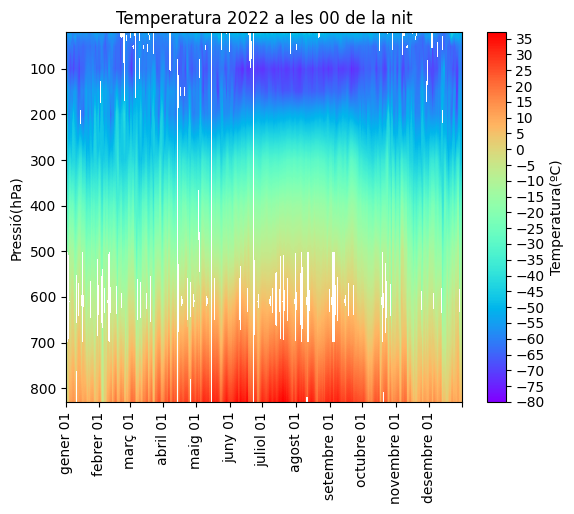

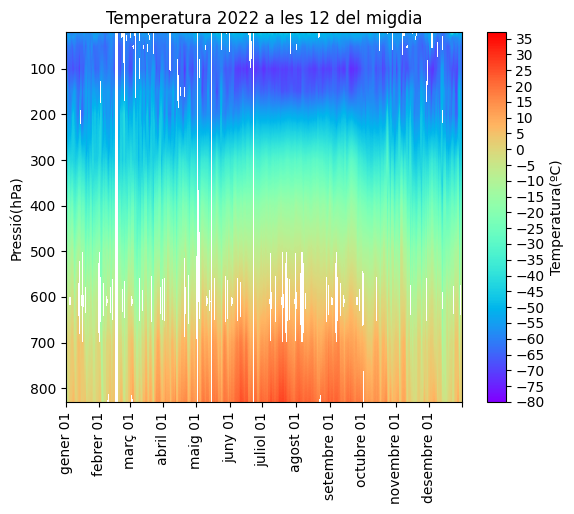

In [6]:
#perfil T
#aquí farem una gràfica amb countorf de les temeperatures:

hora=["00 de la nit","12 del migdia"]
#construim l'array que ens farà d'eix x amb els dies de l'any:
dates_00=[]
dies_mesos=[0,]
a=0
for mes in mesos:
    if mes in mesos_31dies:
        dimes=31
    elif mes in mesos_30dies:
        dimes=30
    elif mes=="febrer":
        dimes=dies_febrer
    for i in np.arange(0,dimes):
        dates_00.append(mes + " " + dies[i])#per fer l'eix X de les gràfiques amb cada dia
        dates_12.append(mes + " " + dies[i])
    a+=dimes
    dies_mesos=np.append(dies_mesos,a)
print(dies_mesos)



for i in [0,1]:
    temp_cbar= np.linspace(-80,37,500)
    plt.contourf(dates_00,np.array(pressionsTot, dtype=float),matriu[i],cmap="rainbow",levels=temp_cbar)
    plt.title(f"Temperatura {any} a les {hora[i]}")
    plt.ylabel("Pressió(hPa)")
    plt.gca().invert_yaxis()
    #rainbow, cool o spring
    plt.xticks(dies_mesos,rotation=90)

    aa=plt.colorbar()

    lavels_cbar=np.linspace(-80,35,24)
    aa.set_ticks(lavels_cbar)
    aa.set_label("Temperatura(ºC)")
    plt.show()

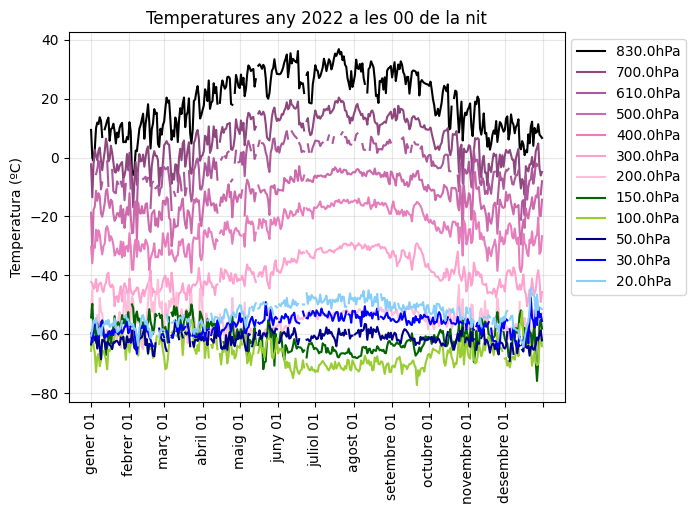

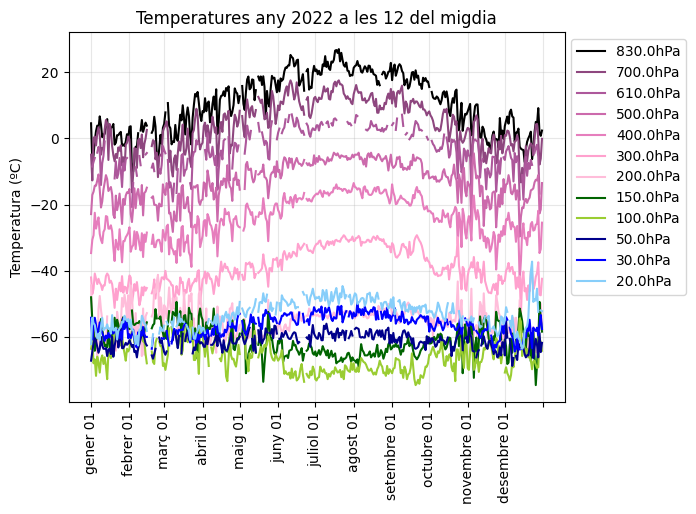

In [7]:
#perfil T
#gràfica de les temperatures durant l'any
#escollim bé els colors
custom_colors = ["k", "#8E477F","#AD589B" , "#CC6AAC","#E67EBD" ,"#FFA1CE" ,"#FFBDDA","darkgreen","yellowgreen","#00008B","#0000FF","#87CEFA","k"]

for h in [0,1]:#una iteració per hora
    #fem un loop per graficar cada pressió
    for i in np.arange(0,len(pressionsTot)):
        plt.plot(dates_00,matriu[h,i,:], label=f'{pressionsTot[i]}hPa',color=custom_colors[i])

    #decoració
    plt.title(f"Temperatures any {any} a les {hora[h]}")
    plt.xticks(dies_mesos,rotation=90)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.ylabel("Temperatura (ºC)")

    plt.grid(alpha=0.3)
    plt.show()
    
    

In [8]:
#a les 00 de la nit

#fem uns arrays on col·locarem a la primera fila els valors de les pressions per no perdrens i a la segona les mitjanes del valor en question
mitj_T_00=np.zeros((2,num_pressions))
mitj_Tr_00=np.zeros((2,num_pressions))
mitj_hr_00=np.zeros((2,num_pressions))
mitj_mixr_00=np.zeros((2,num_pressions))


#aquí col·loquem el que hem dit que col·locaríem
zero1_00=[]
for i in np.arange(0,num_pressions):
  #mirem a partir de quin index hi ha zeros en contes de dades en els arrays amb dades perqué no ens espatllin les mitjanes
    zero1_T_00=np.nonzero(dades_temp_00[i])
    fins_aqui=zero1_T_00[0][-1]
    print(fins_aqui)

    mitj_T_00[0][i]=pressions[i]
    mitj_T_00[1][i]=np.mean(dades_temp_00[i][1:fins_aqui])

    mitj_Tr_00[0][i]=pressions[i]
    mitj_Tr_00[1][i]=np.mean(dades_tempros_00[i][1:fins_aqui])

    mitj_hr_00[0][i]=pressions[i]
    mitj_hr_00[1][i]=np.mean(dades_humrel_00[i][1:fins_aqui])

    mitj_mixr_00[0][i]=pressions[i]
    mitj_mixr_00[1][i]=np.mean(dades_mixr_00[i][1:fins_aqui])


#a les 12 del migdia

zero1_T_12=np.argmax(dades_temp_12==0)
zero1_Tr_12=np.argmax(dades_tempros_12==0)
zero1_hr_12=np.argmax(dades_humrel_12==0)
zero1_mixr_12=np.argmax(dades_mixr_12==0)

#fem uns arrays on col·locarem a la primera fila els valors de les pressions per no perdrens i a la segona les mitjanes del valor en question
mitj_T_12=np.zeros((2,num_pressions))
mitj_Tr_12=np.zeros((2,num_pressions))
mitj_hr_12=np.zeros((2,num_pressions))
mitj_mixr_12=np.zeros((2,num_pressions))

#aquí col·loquem el que hem dit que col·locaríem
zero1_12=[]
for i in np.arange(0,num_pressions):
  #mirem a partir de quin index hi ha zeros en contes de dades en els arrays amb dades perqué no ens espatllin les mitjanes
    zero1_T_12=np.nonzero(dades_temp_12[i])
    fins_aqui=zero1_T_12[0][-1]
    print(fins_aqui)

    mitj_T_12[0][i]=pressions[i]
    mitj_T_12[1][i]=np.mean(dades_temp_12[i][1:fins_aqui])

    mitj_Tr_12[0][i]=pressions[i]
    mitj_Tr_12[1][i]=np.mean(dades_tempros_12[i][1:fins_aqui])


    mitj_hr_12[0][i]=pressions[i]
    mitj_hr_12[1][i]=np.mean(dades_humrel_12[i][1:fins_aqui])

    mitj_mixr_12[0][i]=pressions[i]
    mitj_mixr_12[1][i]=np.mean(dades_mixr_12[i][1:fins_aqui])

362
361
361
362
360
355
356
340
341
328
359
358
358
359
357
351
352
336
337
325


In [9]:
#skew T

#juntem les dades de mitjanes de Temperatura per poder-ho graficar en el diagrama de SkewT:
matriu_skewT=np.vstack((["830.0",np.nanmean(dades2_temp_00_graf[1,1:366])],np.transpose(mitj_T_00[:,0]),["610.0",np.nanmean(dades2_temp_00_graf[0,1:366])],np.transpose(mitj_T_00[:,1:])))
matriu_skewT=np.array(matriu_skewT, dtype=float)


#juntem les dades de mitjanes de Temperatura de rosada de les 00 de la nit per poder-ho graficar en el diagrama de SkewT:
matriu_skewTr=np.vstack((["830.0",np.nanmean(dades2_tr_00_graf[1,1:366])],np.transpose(mitj_Tr_00[:,0]),["610.0",np.nanmean(dades2_tr_00_graf[0,1:366])],np.transpose(mitj_Tr_00[:,1:])))
matriu_skewTr=np.array(matriu_skewTr, dtype=float)
print(matriu_skewT)

#juntem les dades de mitjanes de Temperatura per poder-ho graficar en el diagrama de SkewT:
matriu_skewT12=np.vstack((["830.0",np.nanmean(dades2_temp_12_graf[1,1:366])],np.transpose(mitj_T_12[:,0]),["610.0",np.nanmean(dades2_temp_12_graf[0,1:366])],np.transpose(mitj_T_12[:,1:])))
matriu_skewT12=np.array(matriu_skewT12, dtype=float)



#juntem les dades de mitjanes de Temperatura de rosada de les 12 del migdia per poder-ho graficar en el diagrama de SkewT:
matriu_skewTr12=np.vstack((["830.0",np.nanmean(dades2_tr_12_graf[1,1:366])],np.transpose(mitj_Tr_12[:,0]),["610.0",np.nanmean(dades2_tr_12_graf[0,1:366])],np.transpose(mitj_Tr_12[:,1:])))
matriu_skewTr12=np.array(matriu_skewTr12, dtype=float)

[[830.          19.44600093]
 [700.           6.24376731]
 [610.          -2.28493151]
 [500.         -12.93222222]
 [400.         -24.19      ]
 [300.         -39.07617729]
 [200.         -55.11002786]
 [150.         -61.04689266]
 [100.         -66.56873239]
 [ 50.         -61.62035398]
 [ 30.         -56.60470588]
 [ 20.         -52.92201835]]


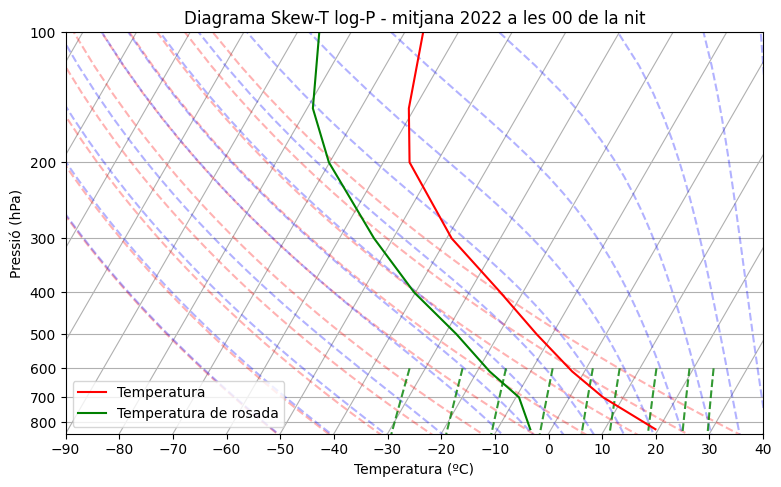

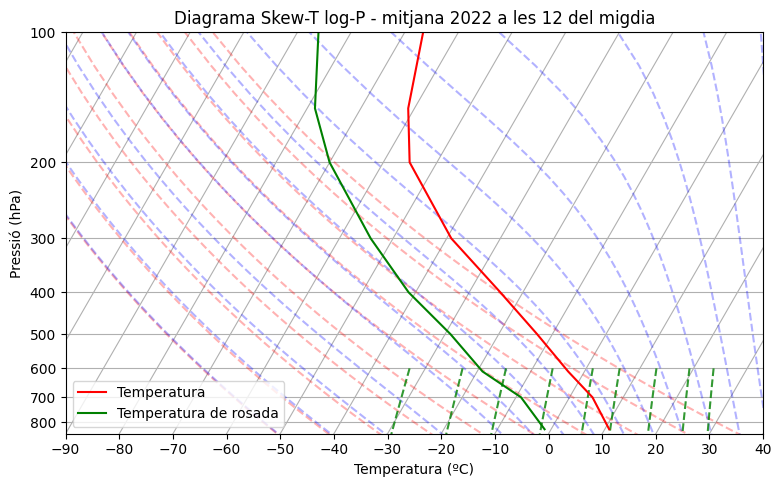

In [10]:
#skewT
#aquí faré els diagrames SkewT:

pressions2=["830.0","700.0","610.0","500.0","400.0","300.0","200.0","150.0","100.0","50.0","30.0","20.0"]

# arrays que graficarem amb unitats:
pressure = np.array(pressions2, dtype=float) * units.hPa
temperature=[matriu_skewT[:,1] * units.degC, matriu_skewT12[:,1] * units.degC]
dew_point = [matriu_skewTr[:,1] * units.degC, matriu_skewTr12[:,1] * units.degC]

#dew_point = mitj_Tr_00[1][:] * units.degC
#temperature = mitj_T_00[1][:] * units.degC

for i in [0,1]:
    # creem el plot:
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig)
    plt.title(f"Diagrama Skew-T log-P - mitjana {any} a les {hora[i]}")

    # grafiquem
    skew.plot(pressure, temperature[i], 'r', label="Temperatura")
    skew.plot(pressure[:], dew_point[i], 'g',label="Temperatura de rosada")

    # Les gràfiques extres de referència
    skew.plot_dry_adiabats(alpha=0.3)#taronja i lila
    skew.plot_moist_adiabats(alpha=0.3)#blau equisaturades
    skew.plot_mixing_lines()#verdes

    # eixos i llegneda
    skew.ax.set_ylim(850, 100)
    skew.ax.set_xlabel("Temperatura (ºC)")
    skew.ax.set_xlim(-90, 40)
    skew.ax.set_ylabel("Pressió (hPa)")
    plt.legend(loc="lower left")

    # ensenyem la gràfica
    plt.show()